# Class activity: Peak over threshold algorithm development

In [1]:
%matplotlib inline
from IPython.display import HTML
from IPython.display import display

# import packages that we need to read the data files
# convert date strings into numerical values for plotting time series
# pandas is a powerful (but a bit more complicated) package to work with spreadsheet data
import pandas as pd
import datetime as dt 

# our two main packages for data analysis
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(city,pollutant='ozone'):
    """A supporting function to load ozone data from a csv file
    
    Args:
        city (str): A string for the city name (must match string in file names).
        pollutant (str): name of the pollutant (defaults to 'ozone')
            Use this second parameter to assign another string 
    
    Returns:
        x (numpy array): an array with the dates (values have type datetime)
        y (numpy array): an array with the concentration
    """
    path="/nfs/home11/staff/timm/Public/Data/hw2/"
    filename=city+'_'+pollutant+'.csv'
    try:
        open(path+filename,'r')
        is_file=True
        print (80*"+")
        print ("Load data for "+city+" pollutant: "+pollutant)
        print ("Local file is "+path+filename)
        print (80*"+")
    except:
        print("Warning: could not open file "+path+filename)
        is_file=False
    
    if is_file:
        df=pd.read_csv(path+filename)
        print(80*"-")
        print ("+ Name of data columns in the Pandas Dataframe:")
        for name in df.columns:
            print (name)
        print(80*"-")
        ########################################################
        # pre-processing of the data
        ########################################################
        
        ########################################################
        # 1. convert the date data (type string) into numerical 
        # values (useful for plotting in plt.plot)
        ########################################################
        
        dates=df['Date'] # extracts the column named 'Date' from dataframe
        datelist=[]
        n=0
        for d in dates: # dates is iterable
            # take the string and convert into a numerical value
            value=dt.datetime.strptime(d,'%m/%d/%y')
            datelist.append(value)
            n=n+1
        
        # 
        x=np.array(datelist) # convert the list with datetimevalues into numpy array
        
        ########################################################
        # 2. extract column with the ozone concentration data
        ########################################################
        # gets data in a type numpy array
        y=df['Daily Max 8-hour Ozone Concentration'].values 
        # units we expect to be the same in each row, so we get one cell value
        unit=df['UNITS'][0] 
        print ("Loaded the data successfully!")
        print ("Number of days in file: "+str(n))
        print ("Dates:"+str(x[0])+" to "+str(x[-1]))
        print ("Concentration values range from: ")
        print ("%12.4f to %12.4f" % (np.nanmin(y), +np.nanmax(y)))
        print ("Units: "+unit)
        
    else:
        print ("do else")
        
        x,y = np.nan, np.nan
    
    return x,y

In [3]:
help(load_data)

Help on function load_data in module __main__:

load_data(city, pollutant='ozone')
    A supporting function to load ozone data from a csv file
    
    Args:
        city (str): A string for the city name (must match string in file names).
        pollutant (str): name of the pollutant (defaults to 'ozone')
            Use this second parameter to assign another string 
    
    Returns:
        x (numpy array): an array with the dates (values have type datetime)
        y (numpy array): an array with the concentration



Note: we have five data files for these cities:

| City          | String to use in function  load_data()  |
|---------------|-----------------------------------------|
| New York City | 'nyc'                                   |
| Los Angeles   | 'los_angeles'                           |
| Houston       | 'houston_tx'                            |
| Philadelphia  | 'philadelphia_pa'                       |
| Phoenix       | 'phoenix_az'                            |


In [34]:
x,ozone = load_data('nyc')

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Load data for nyc pollutant: ozone
Local file is /nfs/home11/staff/timm/Public/Data/hw2/nyc_ozone.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
--------------------------------------------------------------------------------
+ Name of data columns in the Pandas Dataframe:
Date
Site ID
Daily Max 8-hour Ozone Concentration
UNITS
SITE_LATITUDE
SITE_LONGITUDE
Unnamed: 6
Unnamed: 7
--------------------------------------------------------------------------------
Loaded the data successfully!
Number of days in file: 365
Dates:2019-01-01 00:00:00 to 2019-12-31 00:00:00
Concentration values range from: 
      0.0070 to       0.0810
Units: ppm


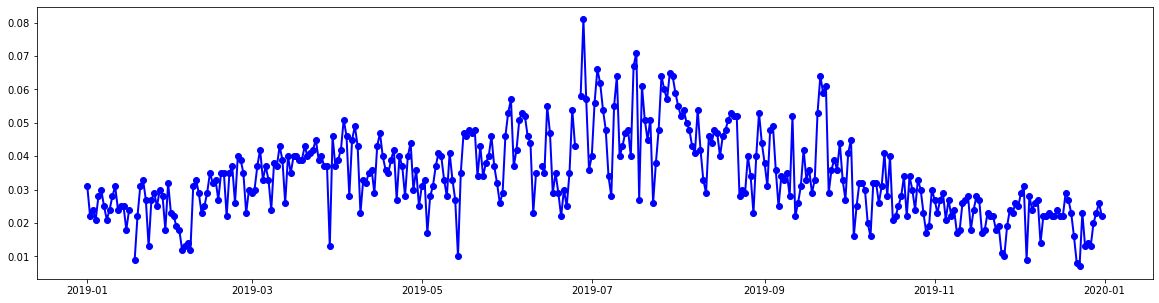

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Load data for los_angeles pollutant: ozone
Local file is /nfs/home11/staff/timm/Public/Data/hw2/los_angeles_ozone.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
--------------------------------------------------------------------------------
+ Name of data columns in the Pandas Dataframe:
Date
Site ID
Daily Max 8-hour Ozone Concentration
UNITS
SITE_LATITUDE
SITE_LONGITUDE
--------------------------------------------------------------------------------
Loaded the data successfully!
Number of days in file: 364
Dates:2019-01-01 00:00:00 to 2019-12-31 00:00:00
Concentration values range from: 
      0.0030 to       0.0800
Units: ppm
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Load data for houston_tx pollutant: ozone
Local file is /nfs/home11/staff/timm/Public/Data/hw2/houston_tx_ozone.csv
+++++++++++++++++++++++++++++++++++++++++++++++

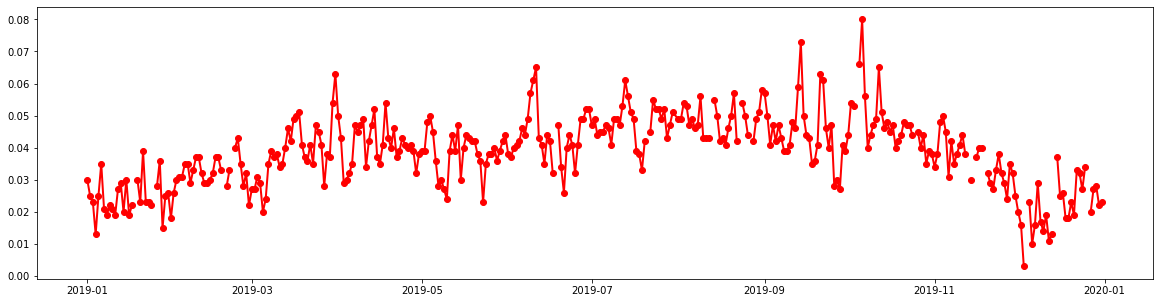

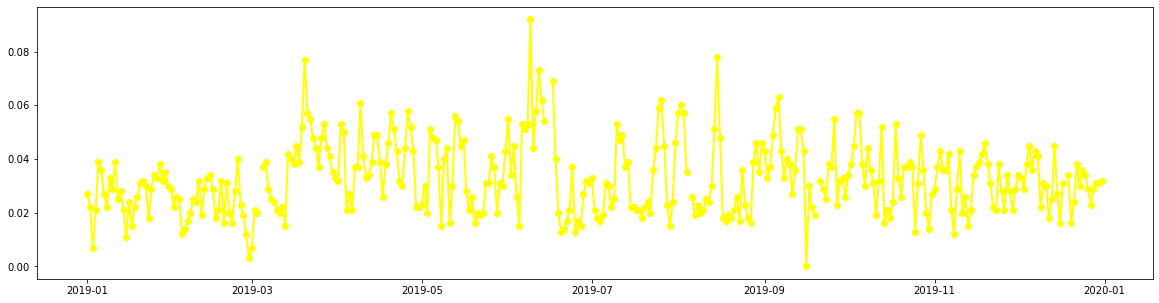

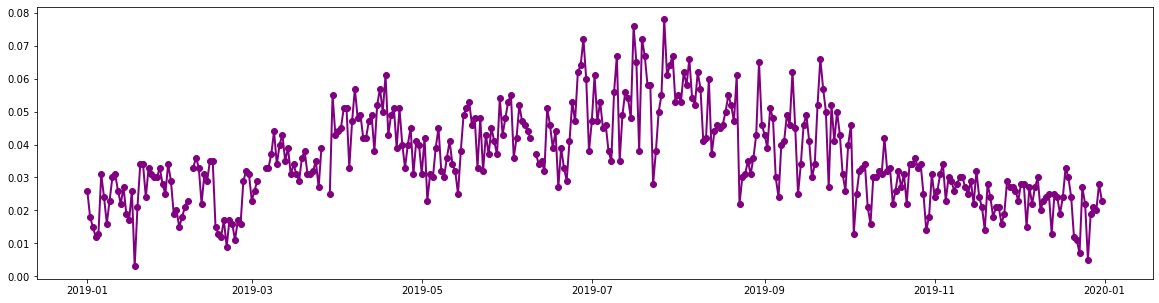

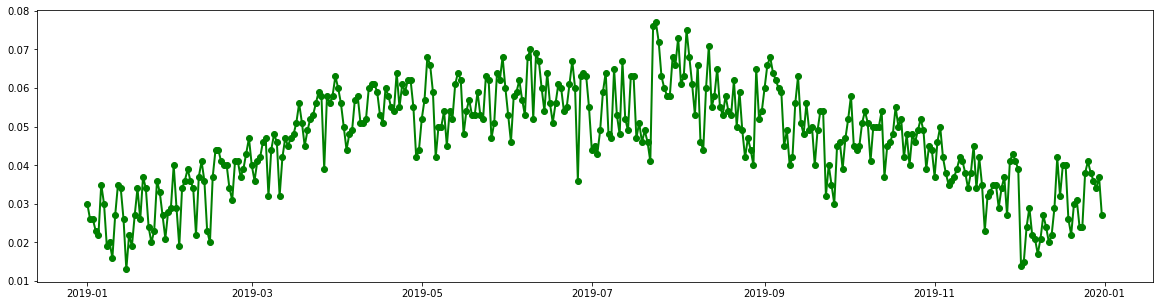

In [13]:

plt.figure(figsize=(20,5))
plt.plot(x,y,"o",color="blue",linewidth=2,linestyle="-")
plt.show()
# NYC Values

a,b=load_data("los_angeles")
plt.figure(figsize=(20,5))
plt.plot(a,b,"o",color="red",linewidth=2,linestyle="-")
# LA Values

c,d=load_data("houston_tx")
plt.figure(figsize=(20,5))
plt.plot(c,d,"o",color="yellow",linewidth=2,linestyle="-")
# TX Values

e,f=load_data("philadelphia_pa")
plt.figure(figsize=(20,5))
plt.plot(e,f,"o",color="purple",linewidth=2,linestyle="-")
# PA Values

g,h=load_data("phoenix_az")
plt.figure(figsize=(20,5))
plt.plot(g,h,"o",color="green",linewidth=2,linestyle="-")
# AZ Values

### Solution with for-loop:

In [56]:
n=0 # index counter
count=0 # exceedence event counter
threshold=0.07 # ppm EPA ozone threshold level

for value in ozone: # use either array, x or ozone --- they're the same size
    value=ozone[n]
    if value > threshold:
        print('Ozone Threshold Level Exceeded!')
        print(40*'-')
        print('date: ' + str(x[n]) + ' , ozone = ' + str(value) + ' ppm ')
        print(40*'-')
        count=count+1
    else:
        pass
    n=n+1
print('We found ' + str(count) + ' days exceeding the threshold value in a total of ' + str(n) + ' days. ')

Ozone Threshold Level Exceeded!
----------------------------------------
date: 2019-06-28 00:00:00 , ozone = 0.081 ppm 
----------------------------------------
Ozone Threshold Level Exceeded!
----------------------------------------
date: 2019-07-17 00:00:00 , ozone = 0.071 ppm 
----------------------------------------
We found 2 days exceeding the threshold value in a total of 365 days. 


### Solution with while-loop:

In [80]:
n=0 # index counter
count=0 # exceedence event counter
threshold=0.07 # ppm EPA ozone threshold level

while n<len(ozone): # use either array, x or ozone --- they're the same size
    value=ozone[n]
    if value > threshold:
        print('Ozone Threshold Level Exceeded!')
        print(40*'-')
        print('date: ' + str(x[n]) + ' , ozone = ' + str(value) + ' ppm ')
        print(40*'-')
        count=count+1
    else:
        pass
    n=n+1
print('We found ' + str(count) + ' days exceeding the threshold value in a total of ' + str(n) + ' days. ')   

Ozone Threshold Level Exceeded!
----------------------------------------
date: 2019-06-28 00:00:00 , ozone = 0.081 ppm 
----------------------------------------
Ozone Threshold Level Exceeded!
----------------------------------------
date: 2019-07-17 00:00:00 , ozone = 0.071 ppm 
----------------------------------------
We found 2 days exceeding the threshold value in a total of 365 days. 


---


In [70]:
test=x[n-1]
type(test)
print(test.year)
print(test.time)
print(test.month)
print(test.date)
print(test.day)
print(str(test.year)+'-'+str(test.month)+'-'+str(test.day))

2019
<built-in method time of datetime.datetime object at 0x7fc09c1146f0>
12
<built-in method date of datetime.datetime object at 0x7fc09c1146f0>
31
2019-12-31


In [83]:
stime=str(test)
print(stime)
print(stime[:10])
print(stime[10:])
print(stime[0:4])
print(stime[5:7])

2019-12-31 00:00:00
2019-12-31
 00:00:00
2019
12


In [87]:
print(ozone[31:31+28])
print(x[31:31+28])

[0.022 0.019 0.018 0.012 0.013 0.014 0.012 0.031 0.033 0.029 0.023 0.025
 0.029 0.035 0.032 0.033 0.027 0.035 0.035 0.022 0.035 0.037 0.026 0.04
 0.039 0.035 0.023 0.03 ]
[datetime.datetime(2019, 2, 1, 0, 0) datetime.datetime(2019, 2, 2, 0, 0)
 datetime.datetime(2019, 2, 3, 0, 0) datetime.datetime(2019, 2, 4, 0, 0)
 datetime.datetime(2019, 2, 5, 0, 0) datetime.datetime(2019, 2, 6, 0, 0)
 datetime.datetime(2019, 2, 7, 0, 0) datetime.datetime(2019, 2, 8, 0, 0)
 datetime.datetime(2019, 2, 9, 0, 0) datetime.datetime(2019, 2, 10, 0, 0)
 datetime.datetime(2019, 2, 11, 0, 0) datetime.datetime(2019, 2, 12, 0, 0)
 datetime.datetime(2019, 2, 13, 0, 0) datetime.datetime(2019, 2, 14, 0, 0)
 datetime.datetime(2019, 2, 15, 0, 0) datetime.datetime(2019, 2, 16, 0, 0)
 datetime.datetime(2019, 2, 17, 0, 0) datetime.datetime(2019, 2, 18, 0, 0)
 datetime.datetime(2019, 2, 19, 0, 0) datetime.datetime(2019, 2, 20, 0, 0)
 datetime.datetime(2019, 2, 21, 0, 0) datetime.datetime(2019, 2, 22, 0, 0)
 datetime.dat

In [95]:
z = ozone > threshold
z.shape
print(x[z])
print(ozone[z])

[datetime.datetime(2019, 6, 28, 0, 0) datetime.datetime(2019, 7, 17, 0, 0)]
[0.081 0.071]
